## Task-1

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict
import pandas as pd
from collections import Counter
from heapq import heappush, heappop
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df_train = pd.read_csv('E:\ML Notes\ML Labs\occupancy_train.txt')

df_train = df_train[['Humidity', 'Light', 'HumidityRatio', 'Occupancy']]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity       8143 non-null   float64
 1   Light          8143 non-null   float64
 2   HumidityRatio  8143 non-null   float64
 3   Occupancy      8143 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 318.1 KB


In [4]:
knn = KNeighborsClassifier()

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
df_test = pd.read_csv('E:\ML Notes\ML Labs\occupancy_test.txt')

df_test = df_test[['Humidity', 'Light', 'HumidityRatio', 'Occupancy']]
rows, cols = df_test.shape

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

max_acc_k = -1
accs = defaultdict(float)
for k in range(1, 11):
  knn.set_params(n_neighbors=k)
  result = knn.predict(X_test)
  difference = (y_test == result).value_counts()

  accs[k] = difference[True] / rows * 100
  max_acc_k = max(max_acc_k, k, key=lambda k: accs[k])

  print(f'Accuracy at k = {k}: {accs[k]:.4}%')

print(f'Highest accuracy with k = {max_acc_k}')

Accuracy at k = 1: 94.03%
Accuracy at k = 2: 92.53%
Accuracy at k = 3: 95.72%
Accuracy at k = 4: 94.48%
Accuracy at k = 5: 95.53%
Accuracy at k = 6: 95.27%
Accuracy at k = 7: 96.32%
Accuracy at k = 8: 96.14%
Accuracy at k = 9: 96.47%
Accuracy at k = 10: 96.47%
Highest accuracy with k = 9


## Task-2

In [7]:
def chi_square_distance(a, b):
    total = 0
    for ai, bi in zip(a, b):
        if ai + bi != 0:  # prevent division by zero
            total += (ai - bi) ** 2 / (ai + bi)
    return total

def get_neighbors(X, y, test_point):
    heap = []
    for features, label in zip(X, y):
        heappush(heap, (chi_square_distance(features, test_point), label))
    return heap

def majority_vote(k, heap):
    labels = [heappop(heap)[1] for _ in range(k)]
    return Counter(labels).most_common(1)[0][0]

def knn_classifier(k, X_train, y_train, X_test):
    k = min(k, len(X_train))
    results = []
    for point in X_test:
        heap = get_neighbors(X_train, y_train, point)
        pred = majority_vote(k, heap)
        results.append(pred)
    return results

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=727
)

preds = knn_classifier(3, X_train, y_train, X_test)
print(f"Accuracy: {accuracy_score(y_test, preds) * 100:.2f}%")

Accuracy: 96.67%


## Task-3

In [9]:
df = pd.read_csv('E:\ML Notes\ML Labs\cancer patient data sets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [10]:
df.Level.value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

<Axes: >

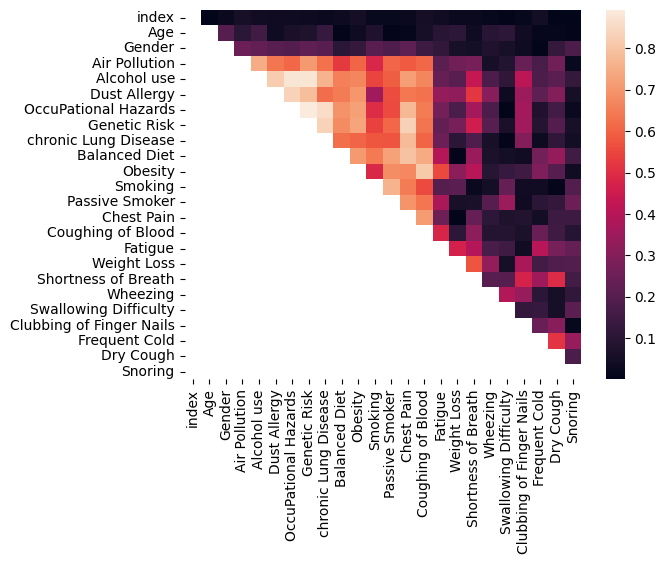

In [11]:
abs_corr = df.corr(numeric_only=True).abs()

upper = abs_corr.where(
  np.triu(np.ones(abs_corr.shape), k=1).astype(bool)
)

sns.heatmap(upper)

In [12]:
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=0, stratify=y_encoded)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)
y_pred_val = knn.predict(X_val)

print("Training:", accuracy_score(y_train, y_pred))
print("Validation:", accuracy_score(y_val, y_pred_val))

Training: 1.0
Validation: 1.0


In [15]:
metrics = ['euclidean', 'manhattan', 'minkowski']
results = {}
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
  knn.fit(X_train, y_train)
  
  acc_train = accuracy_score(y_train, knn.predict(X_train))
  acc_val = accuracy_score(y_val, knn.predict(X_val))
  
  results[metric] = [acc_train, acc_val]

pd.DataFrame(columns=metrics, index=['Training', 'Validation'], data=results)

,euclidean,manhattan,minkowski
Training,1.0,1.0,1.0
Validation,1.0,1.0,1.0
